In [76]:
from LANAM.models import  NAM, LaNAM
from LANAM.trainer import *

from LANAM.data import *
from LANAM.utils import * 

import matplotlib.pyplot as plt
import seaborn as sns
import copy 

from omegaconf import OmegaConf

In [2]:
%reload_ext autoreload
%autoreload 2

In [69]:
with open("./LANAM/config/california_housing_train.yaml") as file:
        cfg = OmegaConf.load(file)

cfg.concurvity_regularization = 0.8473
cfg.wandb.use = False

In [70]:
data = load_california_housing_data(config=cfg)
train_dl, val_dl = data.train_dataloaders()
test_dl = data.test_dataloaders()

samples = data.get_test_samples()

Figure(400x300)


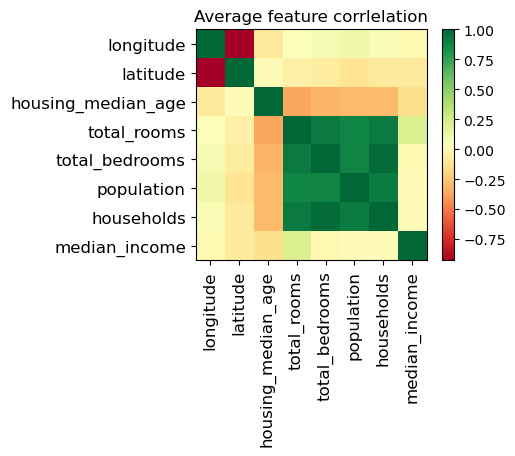

In [71]:
print(plot_feature_correlation_heatmap(samples[0], samples[3]))

In [73]:
model2 = train(config=cfg, train_loader=train_dl, val_loader=val_dl, ensemble=True)

Epoch: 10: 100%|██████████| 30/30 [00:04<00:00,  6.70it/s]


[EPOCH=10]: Train_Loss:  0.575625, Val_Loss:  0.613570,  Train_RMSE:  0.691955, Val_RMSE:  0.724427, Train_R_perp:  0.114273, Val_R_perp:  0.104775


Epoch: 20: 100%|██████████| 30/30 [00:04<00:00,  6.66it/s]


[EPOCH=20]: Train_Loss:  0.528728, Val_Loss:  0.547068,  Train_RMSE:  0.666976, Val_RMSE:  0.685814, Train_R_perp:  0.098986, Val_R_perp:  0.090555


Epoch: 30: 100%|██████████| 30/30 [00:04<00:00,  6.76it/s]


[EPOCH=30]: Train_Loss:  0.487742, Val_Loss:  0.518726,  Train_RMSE:  0.643208, Val_RMSE:  0.668478, Train_R_perp:  0.087366, Val_R_perp:  0.084814


Epoch: 40: 100%|██████████| 30/30 [00:04<00:00,  6.73it/s]


[EPOCH=40]: Train_Loss:  0.506355, Val_Loss:  0.512605,  Train_RMSE:  0.660605, Val_RMSE:  0.663443, Train_R_perp:  0.082563, Val_R_perp:  0.085504


In [74]:
test_mse = test(likelihood='regression', model=model2[0], dataloader=test_dl)
test_rmse = torch.sqrt(test_mse)
print(f'no regularization, test RMSE: {test_rmse: .4f}')

NameError: name 'test' is not defined

In [75]:
feature_importance = plot_feature_importance_errorbar(model2, samples, width=0.5)

TypeError: plot_feature_importance_errorbar() missing 1 required positional argument: 'feature_names'

In [ ]:
with open("./LANAM/config/config.yaml") as file:
        cfg = OmegaConf.load(file)

cfg.concurvity_regularization = 0.5075
cfg.wandb.use = False
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, ensemble=True)

In [ ]:
test_mse = test(likelihood='regression', model=model[0], dataloader=test_dl)
test_rmse = torch.sqrt(test_mse)
print(f'no regularization, test RMSE: {test_rmse: .4f}')

In [ ]:
feature_importance = plot_feature_importance_errorbar(model, samples, width=0.5)

In [ ]:
cfg.concurvity_regularization = 1
curve_model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, ensemble=True)

In [ ]:
curve_test_mse = test(likelihood='regression', model=curve_model[0], dataloader=test_dl)
curve_test_rmse = torch.sqrt(curve_test_mse)
print(f'concurvity regularization, test RMSE: {curve_test_rmse: .4f}')

In [ ]:
curve_feature_importance = plot_feature_importance_errorbar(curve_model, samples, width=0.5)

In [ ]:
cfg.concurvity_regularization = 0
cfg.hsic_regularization = 828
hsic_model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, ensemble=False)

In [ ]:
hsic_test_mse = test(likelihood='regression', model=hsic_model[0], dataloader=test_dl)
hsic_test_rmse = torch.sqrt(hsic_test_mse)
print(f'HSIC regularization, test RMSE: {hsic_test_rmse: .4f}')

In [ ]:
hsic_feature_importance = plot_feature_importance_errorbar(hsic_model, samples, width=0.5)

In [ ]:
cfg.concurvity_regularization = 0
cfg.hsic_regularization = 50
hsic_model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, ensemble=True)

In [ ]:
hsic_test_mse = test(likelihood='regression', model=hsic_model[0], dataloader=test_dl)
hsic_test_rmse = torch.sqrt(hsic_test_mse)
print(f'HSIC regularization, test RMSE: {hsic_test_rmse: .4f}')

In [ ]:
hsic_feature_importance = plot_feature_importance_errorbar(hsic_model, samples, width=0.5)

In [ ]:

samples = data.get_test_samples()
prediction_mean, feature_contribution_mean, prediction_var, feature_contribution_var= get_prediction(model, samples)
cprediction_mean, cfeature_contribution_mean, cprediction_var, cfeature_contribution_var= get_prediction(curve_model, samples)
hprediction_mean, hfeature_contribution_mean, hprediction_var, hfeature_contribution_var= get_prediction(hsic_model, samples)

fig, axs = plt.subplots(2, 4, figsize=(15, 5))
# plt.legend()
axs=axs.ravel()
for idx in range(8):
    
    axs[idx].scatter(samples[0][:, idx], feature_contribution_mean[:, idx], s=10, label='w/o reg', alpha=0.5)
    axs[idx].scatter(samples[0][:, idx], cfeature_contribution_mean[:, idx], s=10,label='w conc reg', alpha=0.5)
    axs[idx].scatter(samples[0][:, idx], hfeature_contribution_mean[:, idx], s=10,label='w hsic reg', alpha=0.5)
    axs[idx].set_title(f'{samples[3][idx]}')
    #axs[idx].set_ylim((-2, 2))
    
plt.tight_layout()

# HSIC and Pearson correlation coefficient
## Both can identify independent features and perfectly correlated features. 

In [ ]:
# perfectly correlated features
num_samples = 5000

x_m1 = torch.randn(num_samples)
x_m2 = copy.copy(x_m1)
features_m = torch.stack([x_m1, x_m2], dim=1)

# independent features
x_i1 = torch.randn(num_samples)
x_i2 = torch.randn(num_samples)
features_i = torch.stack([x_i1, x_i2], dim=1)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(x_m1, x_m2)
axs[1].scatter(x_i1, x_i2)

axs[0].set_title('perfectly correlated')
axs[1].set_title('independent')

In [ ]:
print('[measure correlation]')
c_m = concurvity(features_m)
print(f'perfectly correlated features: {c_m: .6f}')
c_i = concurvity(features_i)
print(f'independent features: {c_i: .6f}')
print(f'ratio: {c_m / c_i: .3f}\n')

print('[measure HSIC]')
h_m = hsic(features_m)
print(f'perfectly correlated features: {h_m: .6f}')
h_i = hsic(features_i)
print(f'independent features: {h_i: .6f}')
print(f'ratio: {h_m / h_i: .3f}')

## HSIC better indicates the dependence between $X$ and $|X|$, comparing to the Pearson correlation coefficient. 

In [ ]:
data = load_nonlinearly_dependent_2D_examples(num_samples=5000)
# data.plot_dataset()
fig = plt.figure(figsize=(4, 3))
plt.scatter(data.features[:, 0], data.features[:, 1])

In [ ]:
c = concurvity(data.features)
print(f'[measured correlation]: {c: .6f}')
print(f'normalized: {c / (c_m - c_i): .3f}')
print(f'ratio to independent features: {c / c_i: .3f}\n')

h = hsic(data.features)
print(f'[measured HSIC]: {h: .6f}')
print(f'normalized: {h / (h_m - h_i): .3f}')
print(f'ratio to independent features: {h / h_i: .3f}')

In [ ]:
plt.subplot(2,1,1)
plt.ylabel("correlation")
plt.bar([1,2,3], [c_m, c_i, c])
plt.xticks([1,2,3],["X1,X1", "X1,X2", "X1,abs(X1)"])
plt.subplot(2,1,2)
plt.ylabel("HSIC")
plt.bar([1,2,3], [h_m, h_i, h])
plt.xticks([1,2,3],["X1,X1", "X1,X2", "X1,abs(X1)"])

$$Y = X_2, X_2 = |X_1|, X_1 \sim U[-1, 1]$$ 

In [ ]:
data = load_nonlinearly_dependent_2D_examples(num_samples=1000, sigma=0.5, sampling_type='uniform', dependent_functions=lambda x: torch.abs(x)) # perfectly correlated features 
train_dl, val_dl = data.train_dataloaders()
test_dl = data.test_dataloaders()

test_samples = data.get_test_samples()
data.plot_dataset()

print(f'R_perp of raw features: {concurvity(data.features)}')

In [ ]:
cfg = toy_default()
# cfg.output_regularization = 0.05
cfg.hidden_sizes=[64, 64, 64]
cfg.log_loss_frequency = 200
cfg.num_epochs = 200
cfg.early_stopping_patience = 10
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, test_samples=test_samples, ensemble=True)

In [ ]:
cfg.concurvity_regularization = 0.1
cfg.hsic_regularization = 0
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, test_samples=test_samples, ensemble=True)

In [ ]:
cfg.concurvity_regularization = 0
cfg.hsic_regularization = 50
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, test_samples=test_samples, ensemble=True)

$$Y = X_2, X_2 = \sin2X_1, X_1 \sim U[-1, 1]$$ 

In [ ]:
data = load_nonlinearly_dependent_2D_examples(
                                                      num_samples=1000, 
                                                      sigma=0.5, 
                                                      sampling_type='uniform', 
                                                      dependent_functions=lambda x: torch.sin(3*x)) # perfectly correlated features 
train_dl, val_dl = data.train_dataloaders()
test_dl = data.test_dataloaders()
test_samples = data.get_test_samples()
data.plot_dataset()
print(f'R_perp of raw features: {concurvity(data.features)}')

In [ ]:
cfg = toy_default()
# cfg.output_regularization = 0.05
cfg.hidden_sizes=[64, 64, 64]
cfg.log_loss_frequency = 200
cfg.num_epochs = 200
cfg.early_stopping_patience = 10
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, test_samples=test_samples, ensemble=True)

In [ ]:
cfg.concurvity_regularization = 0.1
cfg.hsic_regularization = 0
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, test_samples=test_samples, ensemble=True)

In [ ]:
cfg.concurvity_regularization = 0
cfg.hsic_regularization = 100
model = train(config=cfg, train_loader=train_dl, val_loader=val_dl, test_samples=test_samples, ensemble=True)

### concurvity examples
$$
X_1 \sim X_2 \sim X_3 \sim U(0,1)\\
X_4 = X_2^3 + X_3 ^ 2 + \sigma_1\\
X_5 = X_3^2+\sigma_1\\
X_6 = X_2^2 + X_4^3+\sigma_1 \\
X_7 = X_1 \times X_4 +\sigma_1\\
Y = 2X_1^2 + X_5^3 + 2\sin X_6+\sigma_2
$$

In [13]:
with open("./LANAM/config/concurvity_train.yaml") as file:
        cfg = OmegaConf.load(file)

cfg.concurvity_regularization = 1
cfg.wandb.use = False

R_perp of raw features: 0.4246672987937927


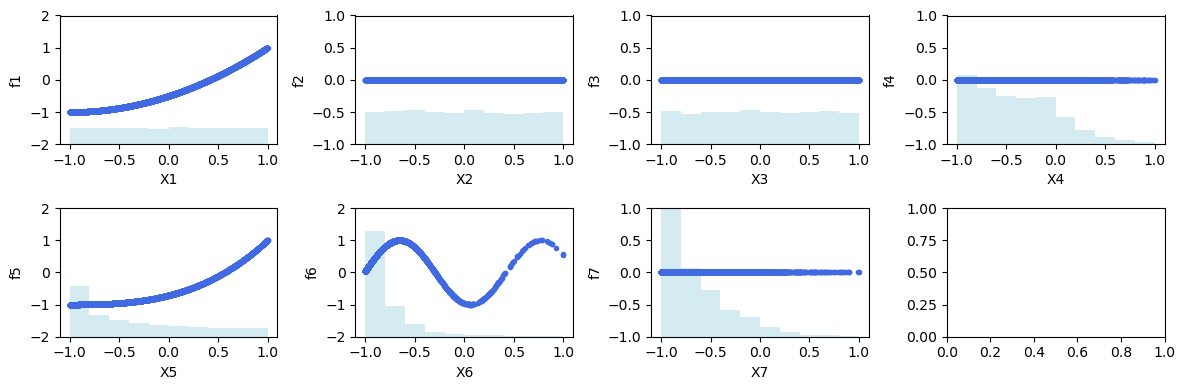

In [59]:
data = load_concurvity_data(config=cfg, sigma_1=0.05, sigma_2=0.5, num_samples=5000)
train_dl, val_dl = data.train_dataloaders()
test_dl = data.test_dataloaders()
test_samples = data.get_test_samples()

print(f'R_perp of raw features: {concurvity(data.features)}')
data.plot_dataset()
# plot_feature_correlation_heatmap(concurvity_data.features, concurvity_data.feature_names)*

In [29]:
cfg.concurvity_regularization = 1
model = train(config=cfg, train_loader= train_dl, val_loader= val_dl, test_samples= test_samples, ensemble=True)

Epoch: 2:  33%|███▎      | 1/3 [00:00<00:00,  4.31it/s]


KeyboardInterrupt: 

In [ ]:
cfg.concurvity_regularization = 0
cfg.hsic_regularization = 800
model = train(config=cfg, train_loader= train_dl, val_loader= val_dl, test_samples= test_samples, ensemble=True)